In [2]:
# External
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
# Std
import os
# Local
from lib.functions import show_sample_images
from CGAN import CGanNet

In [3]:
NET_NAME = "Last_CGAN_try4"
BATCH_SIZE = 32
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
LEARNING_RATE_DISC: float = 0.0002
LEARNING_RATE_GAN: float = 0.0002
DROPOUT_RATE: float = 0.4
DENSE_UNITS=128
CONV_LAYERS = 2
BATCH_NORM = False

In [4]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
# Load flowers dataset
(flowers_training_set, flowers_validation_set), flowers_dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test[:49%]', 'validation'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
flowers_dataset_size = flowers_dataset_info.splits['test[:49%]'].num_examples
print(f'Flower dataset size is: {flowers_dataset_size}')

Flower dataset size is: 3013


In [6]:
# Load birds dataset
(birds_training_set, birds_test_set), birds_dataset_info = tfds.load(
    'caltech_birds2010',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
birds_dataset_size = birds_dataset_info.splits['train'].num_examples
print(f'Birds dataset size is: {birds_dataset_size}')

Birds dataset size is: 3000


In [7]:
# Load dogs dataset
(dogs_training_set, dogs_test_set), dogs_dataset_info = tfds.load(
    'stanford_dogs',
    split=['train[:25%]', 'test'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
dogs_dataset_size = dogs_dataset_info.splits['train[:25%]'].num_examples
print(f'Dogs dataset size is: {dogs_dataset_size}')

Dogs dataset size is: 3000


In [8]:
# Preprocessing images
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    # image = image / 255.0
    image = (image - 127.5) / 127.5
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    return image, label
flowers_train_batches = flowers_training_set.shuffle(flowers_dataset_size//4).map(format_image)
birds_train_batches = birds_training_set.shuffle(birds_dataset_size//4).map(format_image)
dogs_train_batches = dogs_training_set.shuffle(dogs_dataset_size//4).map(format_image)

# Get labels numbers to names map
labels_strings = {
    0: "Kwiat",
    1: "Ptak",
    2: "Pies"
}

In [9]:
# Create numpy arrays with images and labels
flowers_numpy_train_batches_images = np.array([_[0] for _ in flowers_train_batches])
flowers_numpy_train_batches_labels = np.array([0 for _ in flowers_train_batches])
birds_numpy_train_batches_images = np.array([_[0] for _ in birds_train_batches])
birds_numpy_train_batches_labels = np.array([1 for _ in birds_train_batches])
dogs_numpy_train_batches_images = np.array([_[0] for _ in dogs_train_batches])
dogs_numpy_train_batches_labels = np.array([2 for _ in dogs_train_batches])

In [10]:
numpy_train_batches_images = np.concatenate((dogs_numpy_train_batches_images, flowers_numpy_train_batches_images, birds_numpy_train_batches_images))
numpy_train_batches_labels = np.concatenate((dogs_numpy_train_batches_labels, flowers_numpy_train_batches_labels, birds_numpy_train_batches_labels))
# numpy_train_batches_images = flowers_numpy_train_batches_images
# numpy_train_batches_labels = flowers_numpy_train_batches_labels
dataset_size = flowers_dataset_size + birds_dataset_size + dogs_dataset_size
# dataset_size = flowers_dataset_size

In [11]:
cgan = CGanNet(net_name=NET_NAME,
               batch_size=BATCH_SIZE,
               image_width=IMAGE_WIDTH,
               image_height=IMAGE_HEIGHT,
               learning_rate_disc= LEARNING_RATE_DISC,
               learning_rate_gan=LEARNING_RATE_GAN,
               dropout_rate= DROPOUT_RATE,
               generator_dense_units=DENSE_UNITS,
               num_conv_layers=CONV_LAYERS,
               batch_norm=BATCH_NORM,
               number_of_channels=3,
               latent_dimension=100,
               training_data=numpy_train_batches_images,
               labels_data=numpy_train_batches_labels,
               number_of_classes=3,
               labels_names = labels_strings)

In [12]:
# Define GAN models
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()

In [13]:
# cgan.train(number_of_epochs=1, load_past_model=False)

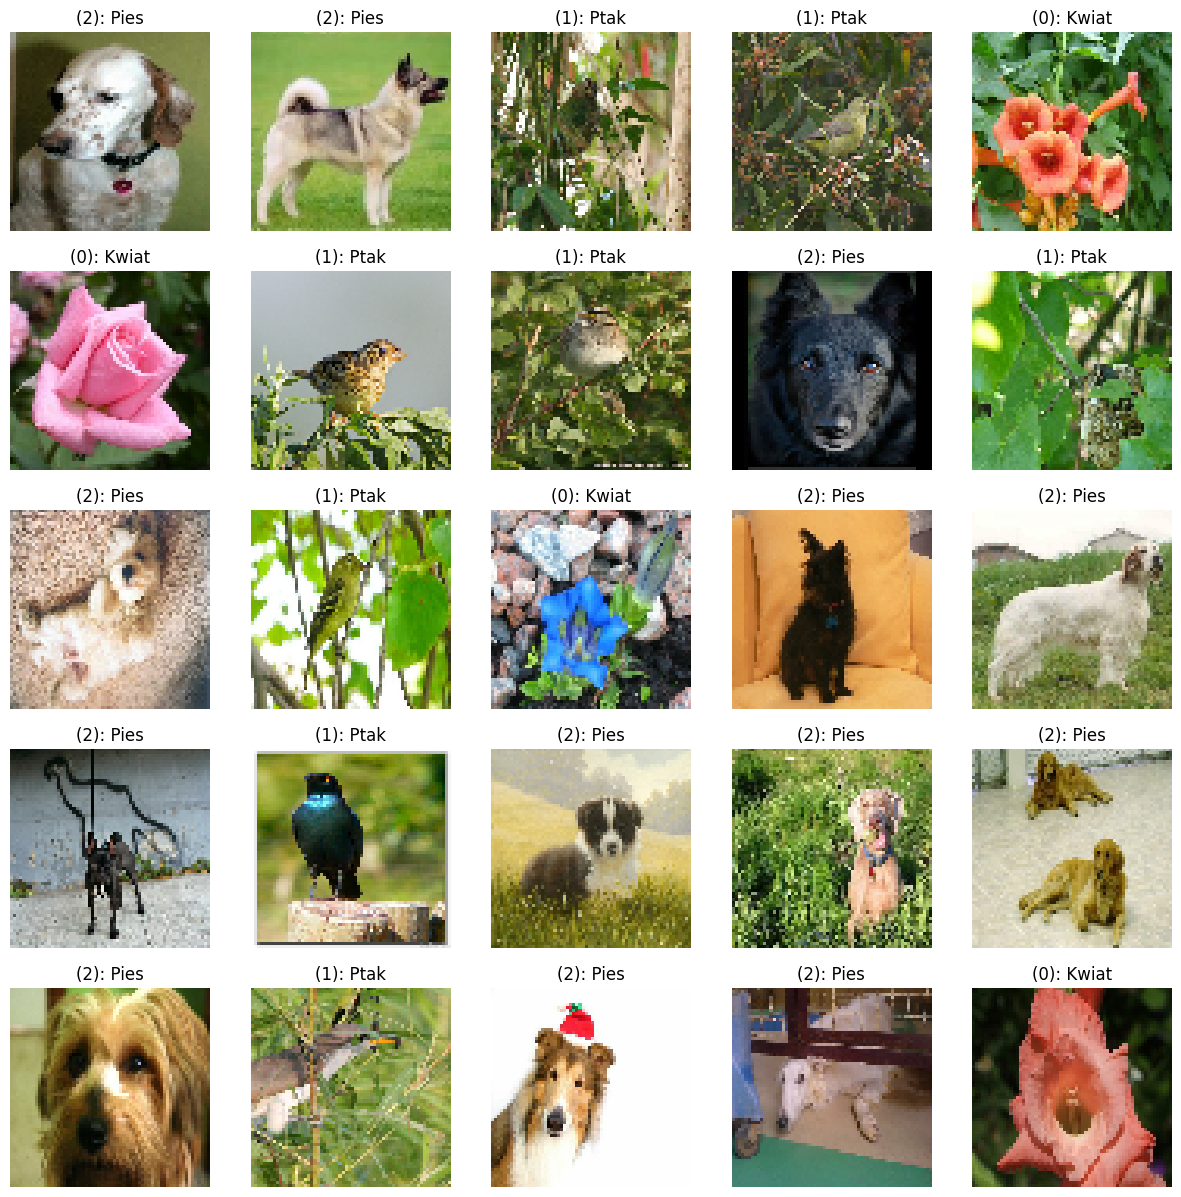

In [14]:
show_sample_images(numpy_train_batches_images, numpy_train_batches_labels, labels_strings, NET_NAME, dataset_size=dataset_size)

In [15]:
cgan.visualize_models()

In [ ]:
cgan.train(number_of_epochs=500, load_past_model=True)

Number of images in dataset: 9013
Batches per epoch: 281
Half batch size is: 16
----> Load epoch number: 829 from file /home/kamil/Repositories/GAN_mg/Last_CGAN_try4_data/.epoch
------------------------------------------------------------
---> Epoch: 830 1/500
---> Start time is: 09:25:54
281/281 [==============================] - 57s 182ms/step
---> End time is: 09:26:52
---> D_real_loss: 0.6014910340309143 D_fake_loss: 0.6377270817756653 G_loss: 0.8326956033706665
----> D_real_acc: 0.75 D_fake_acc: 0.75
----> Epoch training time: 0.0h 0.0m, 57s
------------------------------------------------------------
---> Epoch: 831 2/500
---> Start time is: 09:26:53
281/281 [==============================] - 52s 186ms/step
---> End time is: 09:27:45
---> D_real_loss: 0.6553138494491577 D_fake_loss: 0.6678286790847778 G_loss: 0.7401265501976013
----> D_real_acc: 0.625 D_fake_acc: 0.6875
----> Epoch training time: 0.0h 0.0m, 52s
------------------------------------------------------------
---> Epo

In [ ]:
cgan.get_training_time()